# Python-Programmierung Abgabe von Sebastian Gerz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def load_data(file_path):
    """
    Daten aus der gegebenen Excel einlesen
    INPUT: Dateipfad als String zur Excel-Datei
    OUTPUT: Gerichtetabelle, Getränketabelle als pandas Dataframe
    """
    bella_capri_gerichte = pd.read_excel(file_path, sheet_name="Gerichte")
    bella_capri_getränke = pd.read_excel(file_path, sheet_name="Getränke")
    return bella_capri_gerichte, bella_capri_getränke

In [3]:
bella_capri_gerichte, bella_capri_getränke = load_data('BellaCapri.xlsx')

def average_demand_chart():
    # Durchschnittlicher Bedarf an Pizza, Pasta und Salat Chart
    average_demand = bella_capri_gerichte[['Pizza', 'Pasta', 'Salat']].mean()

    fig, ax = plt.subplots(figsize=(10, 5))
    average_demand.plot(kind='bar', ax=ax, legend=False, color=['tomato', 'gold', 'green'])
    ax.set_title('Durchschnittlicher Bedarf an Pizza, Pasta und Salat pro Tag')
    ax.set_ylabel('Durchschnittliche Anzahl Portionen')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    print(average_demand)
    plt.show() 

def reservations_chart():
    # Reservierungen vs Besucheranzahl Chart
    X = bella_capri_gerichte[['Reservierungen']].values
    y = bella_capri_gerichte['Besucher'].values
    model = LinearRegression()
    model.fit(X, y)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(X, y, color='blue', label='Datenpunkte')
    ax.plot(X, model.predict(X), color='red', label='Regressionslinie')
    ax.set_title('Reservierungen vs Besucheranzahl')
    ax.set_xlabel('Reservierungen')
    ax.set_ylabel('Besucheranzahl')
    ax.legend()
    plt.show()  

def weekday_visitors_chart():
    # Besucheranzahl pro Wochentag Chart
    weekday_visitors = bella_capri_gerichte.groupby('Wochentag')['Besucher'].mean()

    fig, ax = plt.subplots(figsize=(10, 5))
    weekday_visitors.plot(kind='bar', ax=ax, color='lightblue')
    ax.set_title('Durchschnittliche Besucheranzahl pro Wochentag')
    ax.set_ylabel('Durchschnittliche Besucheranzahl')
    ax.set_xlabel('Wochentag')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    print(weekday_visitors)
    plt.show() 

def drinks_demand_chart():
    # Getränkekonsum pro Tag Chart
    drinks_demand = bella_capri_getränke[['Mineralwasser', 'Apfelschorle', 'Cola', 'Bier', 'Wein', 'Sonstiges']].mean()

    fig, ax = plt.subplots(figsize=(10, 5))
    drinks_demand.plot(kind='bar', ax=ax, color='lightblue')
    ax.set_title('Durchschnittlicher Getränkekonsum pro Tag')
    ax.set_ylabel('Menge in Litern')
    ax.set_xlabel('Getränke')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    print(drinks_demand)
    plt.show()  

Pizza    85.375000
Pasta    51.785714
Salat    41.375000
dtype: float64


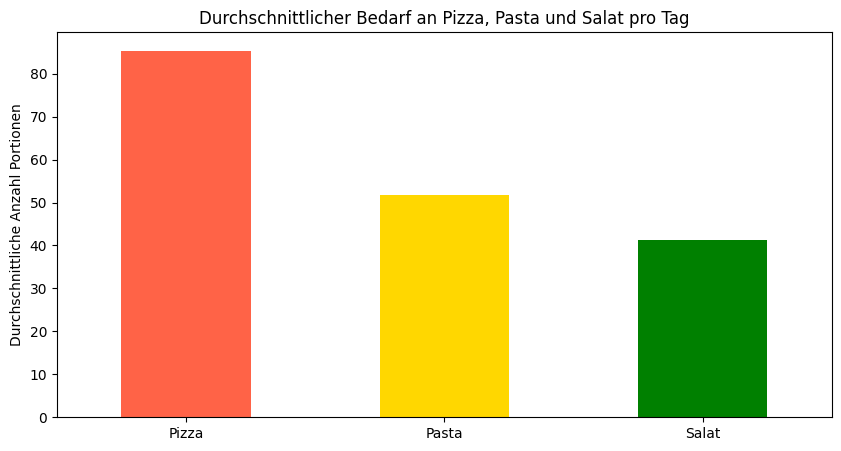

In [4]:
# 1. möchte er abschätzen können, wie viele Pizzas, wie viel frischen Salat und wie viele Nudeln er pro Tag benötigt. 

average_demand_chart()

Mineralwasser    126.339286
Apfelschorle      84.035714
Cola              83.892857
Bier              84.160714
Wein             126.642857
Sonstiges         41.607143
dtype: float64


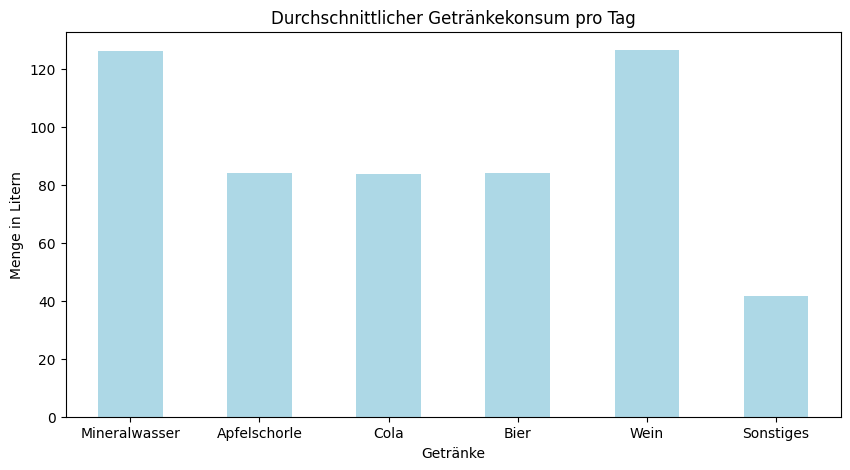

In [5]:
# 2. Desweiteren möchte er gerne abschätzen, was er an verschiedenen Getränken besorgen muss.

drinks_demand_chart()

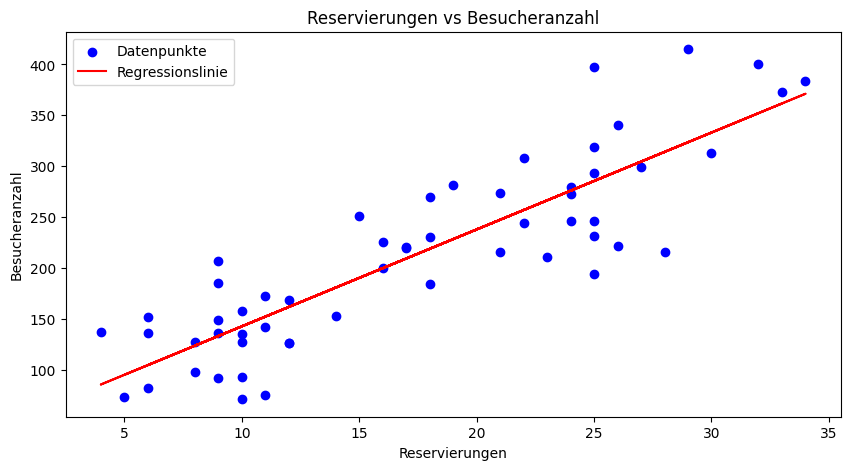

In [6]:
# 3. Da die Zahl der täglichen Gäste vermutlich schwer genau vorherzusagen ist überlegt er, ob es wohl einen (linearen) Zusammenhang 
# zwischen den Vorab-Reservierungen und der Gesamtzahl der Gäste pro Tag gibt, so dass er Anhand der Reservierungen eine Vorhersage über die zu erwartende Gesamtzahl der Gäste treffen kann.

reservations_chart()

Wochentag
Di    114.125
Do    224.625
Fr    266.125
Mi    140.625
Mo    135.375
Sa    367.875
So    238.875
Name: Besucher, dtype: float64


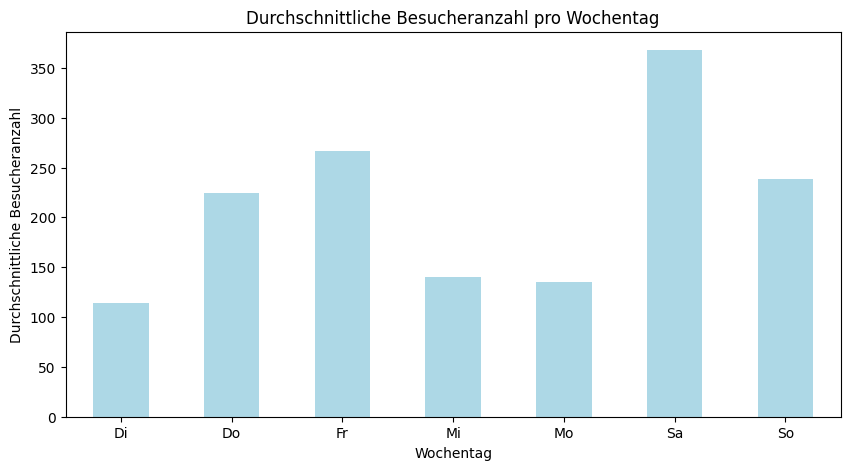

In [7]:
# 4. Außerdem möchte er entscheiden, an welchem Tag er zukünftig Ruhetag machen soll.

weekday_visitors_chart()